## Feature Selection

In this part we will go ahed and select only those columns which are really required because not all the columns play a significant role in contributing to the target feature.

Feature Selection can be performed in mulitple ways mainly we use statistical methods to do that like corealtion, variance thresholding, chi-squared, L2 norm, etc.

In our case we will use extra trees classifier for selecting the features.

In [72]:
from sklearn.ensemble import ExtraTreesClassifier
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
%matplotlib inline

In [73]:
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [74]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [75]:
ds1 = pd.read_csv('bank2.csv')

In [76]:
ds1.head()

,Unnamed: 0,age,default,balance,housing,loan,day,campaign,pdays,previous,deposit,ordinal_job,ordinal_marital,ordinal_education,ordinal_contact,ordinal_month,ordinal_poutcome,duration(in minutes)
0,0,59.0,0,0.908149,1,0,5,1,-1.0,0,1,7,1,2,1,1,1,17
1,1,56.0,0,-0.794565,0,0,5,1,-1.0,0,1,7,1,2,1,1,1,17
2,2,41.0,0,0.113105,1,0,5,1,-1.0,0,1,5,1,2,1,1,1,17
3,3,55.0,0,1.006696,1,0,5,1,-1.0,0,1,4,1,2,1,1,1,9
4,4,54.0,0,-0.691572,0,0,5,2,-1.0,0,1,7,1,4,1,1,1,11


In [77]:
ds1.drop(['Unnamed: 0'],axis =1,inplace = True)

In [78]:
ds1.head()

,age,default,balance,housing,loan,day,campaign,pdays,previous,deposit,ordinal_job,ordinal_marital,ordinal_education,ordinal_contact,ordinal_month,ordinal_poutcome,duration(in minutes)
0,59.0,0,0.908149,1,0,5,1,-1.0,0,1,7,1,2,1,1,1,17
1,56.0,0,-0.794565,0,0,5,1,-1.0,0,1,7,1,2,1,1,1,17
2,41.0,0,0.113105,1,0,5,1,-1.0,0,1,5,1,2,1,1,1,17
3,55.0,0,1.006696,1,0,5,1,-1.0,0,1,4,1,2,1,1,1,9
4,54.0,0,-0.691572,0,0,5,2,-1.0,0,1,7,1,4,1,1,1,11


In [79]:
x = ds1.drop('deposit',axis = 1) 
y = ds1['deposit']

In [80]:
# creating the object

ec = ExtraTreesClassifier()

In [81]:
ec.fit(x,y) # applying the classifier

ExtraTreesClassifier()

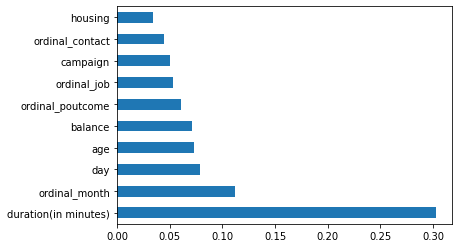

In [82]:
# plotting the scores and values

f_s = pd.Series(ec.feature_importances_, index = x.columns, name = 'features')
fs = f_s.nlargest(10).plot(kind = 'barh')

In [83]:
fss = f_s.nlargest(10) # copying the series

In [84]:
ds2 = ds1[fss.index] # making a data frame of only selected features

In [85]:
ds2.head() # seeing the results

,duration(in minutes),ordinal_month,day,age,balance,ordinal_poutcome,ordinal_job,campaign,ordinal_contact,housing
0,17,1,5,59.0,0.908149,1,7,1,1,1
1,17,1,5,56.0,-0.794565,1,7,1,1,0
2,17,1,5,41.0,0.113105,1,5,1,1,1
3,9,1,5,55.0,1.006696,1,4,1,1,1
4,11,1,5,54.0,-0.691572,1,7,2,1,0


In [86]:
ds2['ordinal_month'].unique()

array([ 1,  5,  3,  6,  9,  4, 12,  2,  7, 11,  8, 10], dtype=int64)

In [87]:
min(ds2['balance'])

-2.500242380479732

### Model Building

In [88]:
# creating a class for all the the maachine learning algorithms and using it one by one

class models:
    
    def svmm(self,x_train, y_train, x_test, y_test):
        
        sv = SVC()
        m_sv = sv.fit(x_train, y_train)
        y_hat = m_sv.predict(x_test)
        print('accuracy of SVM is:', accuracy_score(y_test, y_hat))
        sns.heatmap(confusion_matrix(y_test, y_hat),annot = True)
        
        
    def dt(self,x_train,y_train, x_test, y_test):
        
        dct = DecisionTreeClassifier()
        m_sv = dct.fit(x_train,y_train)
        y_hat = m_sv.predict(x_test)
        print('accuracy of decison tree is:',accuracy_score(y_test, y_hat))
        sns.heatmap(confusion_matrix(y_test, y_hat),annot = True)
        
        
    def rf(self,x_train, y_train, x_test, y_test):
        
        rff = RandomForestClassifier()
        rf1 = rff.fit(x_train,y_train)
        y_hat = rf1.predict(x_test)
        print('accuracy of random forest is',accuracy_score(y_test, y_hat))
        print(classification_report(y_test, y_hat))
        sns.heatmap(confusion_matrix(y_test, y_hat),annot = True)
        return rf1
        
        
    def gd(self,x_train, y_train, x_test, y_test):
        
        gdd = GradientBoostingClassifier()
        m_sv = gdd.fit(x_train,y_train)
        y_hat = m_sv.predict(x_test)
        print('accuracy of gradient boosting is',accuracy_score(y_test, y_hat))
        sns.heatmap(confusion_matrix(y_test, y_hat),annot = True)
        
        
    def xgb(self,x_train, y_train, x_test, y_test):
        
        xg = XGBClassifier()
        m_sv = xg.fit(x_train,y_train)
        y_hat = m_sv.predict(x_test)
        print('accuracy of xtreme gradient boosting is', accuracy_score(y_test, y_hat))
        sns.heatmap(confusion_matrix(y_test, y_hat),annot = True)
        return m_sv
        

In [89]:
# separating x and y
X = ds2[:] 
Y = ds1['deposit']

In [90]:
# splitting data in train and test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

accuracy of SVM is: 0.8262427227944469


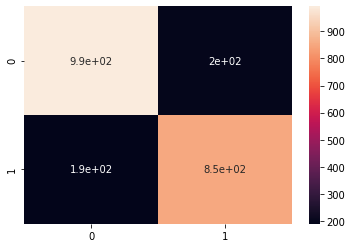

In [91]:
# creating a object of models class
model = models()
model.svmm(x_train,y_train,x_test,y_test) # calling svm

accuracy of decison tree is: 0.7926556202418271


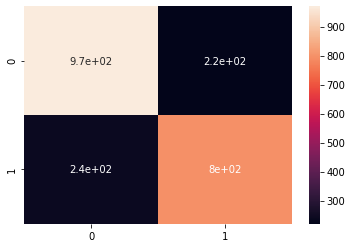

In [92]:
model.dt(x_train,y_train,x_test,y_test)

accuracy of random forest is 0.8508732646663681
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1190
           1       0.82      0.87      0.84      1043

    accuracy                           0.85      2233
   macro avg       0.85      0.85      0.85      2233
weighted avg       0.85      0.85      0.85      2233



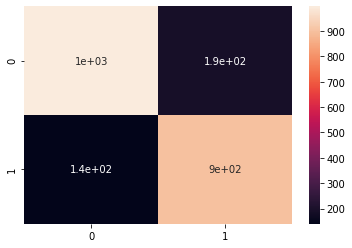

In [93]:
modd = model.rf(x_train,y_train,x_test,y_test)


accuracy of gradient boosting is 0.8468428123600538


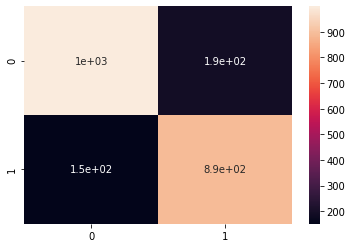

In [94]:
model.gd(x_train.values,y_train.values,x_test.values,y_test.values)

accuracy of xtreme gradient boosting is 0.8472906403940886


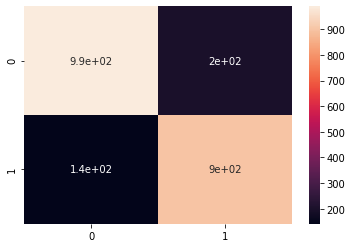

In [95]:
mod = model.xgb(x_train.values,y_train.values,x_test.values,y_test.values)

In [96]:
#with open('saved_rf.pkl', 'wb') as wr:
#    pickle.dump(modd, wr)


In [97]:
nn = np.array([[15,20,2,3,1000,1,4,1,1,1]])
nn

array([[  15,   20,    2,    3, 1000,    1,    4,    1,    1,    1]])

In [98]:
modd.predict([[15,20,2,3,1000,1,4,1,1,1]])

array([1], dtype=int64)

In [99]:
#mod.get_booster().feature_names